In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns

import module
import importlib
try:
    importlib.reload(module) # reload module
except NameError:
    pass

In [2]:
path = Path.cwd().parents[0] / "output/vote_result.xlsx"
df = pd.read_excel(path)

# 1. Apakah Gabung ke Partai Besar Lebih Baik dari Gabung ke Partai Kecil?

Dalam kasus ini, partai besar akan kita artikan sebagai partai yang total vote nya di atas median total vote dari seluruh partai. 
Sebaliknya, partai kecil akan kita artikan sebagai partai yang total vote nya di bawah median total vote dari seluruh partai. 

Berikut adalah tabel partai, total vote beserta ukurannya.

In [3]:
(df
    .groupby("partai")
    .agg(total_vote=("partai_vote", "sum"))
    .sort_values("total_vote", ascending=False)
    .reset_index()
    .assign(
        ukuran_partai=lambda df_: np.where(
            (df_["total_vote"] < df_["total_vote"].median()),
            "Partai Kecil",
            "Partai Besar",
        )
    )
    .rename(columns=lambda c: c.replace("_", " ").title())
)

,Partai,Total Vote,Ukuran Partai
0,Partai Demokrasi Indonesia Perjuangan,6126466,Partai Besar
1,Partai Gerakan Indonesia Raya,3050585,Partai Besar
2,Partai Keadilan Sejahtera,2936670,Partai Besar
3,Partai Solidaritas Indonesia,2003709,Partai Besar
4,Partai Demokrat,1162203,Partai Besar
5,Partai Kebangkitan Bangsa,985702,Partai Besar
6,Partai Amanat Nasional,951897,Partai Besar
7,Partai Nasdem,877379,Partai Besar
8,Partai Golongan Karya,812363,Partai Kecil
9,Partai Persatuan Indonesia,780551,Partai Kecil


Selain itu, kita perlu mencari jumlah calon DPRD per partai dan jumlah DPRP terpilih per partai.

In [4]:
(df
    .groupby("partai")
    .agg(
        total_vote=("partai_vote", "sum"),
        jumlah_calon=("nama", "size"),
        jumlah_terpilih=("terpilih", "sum")
    )
    .sort_values("total_vote", ascending=False)
    .reset_index()
    .assign(
        ukuran_partai=lambda df_: np.where(
            (df_["total_vote"] < df_["total_vote"].median()),
            "Partai Kecil",
            "Partai Besar",
        ), 
        persentase_terpilih=lambda df_: df_['jumlah_terpilih'].div(df_['jumlah_calon']).mul(100).round(1)
    )
    .loc[:, ['partai', 'total_vote', 'ukuran_partai', 'jumlah_calon', 'jumlah_terpilih', 'persentase_terpilih']]
    .rename(columns=lambda c: c.replace("_", " ").title())
)

,Partai,Total Vote,Ukuran Partai,Jumlah Calon,Jumlah Terpilih,Persentase Terpilih
0,Partai Demokrasi Indonesia Perjuangan,6126466,Partai Besar,106,25,23.6
1,Partai Gerakan Indonesia Raya,3050585,Partai Besar,106,19,17.9
2,Partai Keadilan Sejahtera,2936670,Partai Besar,106,16,15.1
3,Partai Solidaritas Indonesia,2003709,Partai Besar,106,8,7.5
4,Partai Demokrat,1162203,Partai Besar,106,10,9.4
5,Partai Kebangkitan Bangsa,985702,Partai Besar,106,5,4.7
6,Partai Amanat Nasional,951897,Partai Besar,106,9,8.5
7,Partai Nasdem,877379,Partai Besar,106,7,6.6
8,Partai Golongan Karya,812363,Partai Kecil,106,6,5.7
9,Partai Persatuan Indonesia,780551,Partai Kecil,106,0,0.0


Terlihat dari tabel ini bahwa bergabung ke partai besar jauh lebih baik daripada bergabung ke partai kecil. 

In [5]:
(df
    .groupby("partai")
    .agg(
        total_vote=("partai_vote", "sum"),
        jumlah_calon=("nama", "size"),
        jumlah_terpilih=("terpilih", "sum")
    )
    .sort_values("total_vote", ascending=False)
    .reset_index()
    .assign(
        ukuran_partai=lambda df_: np.where(
            (df_["total_vote"] < df_["total_vote"].median()),
            "Partai Kecil",
            "Partai Besar",
        ), 
        persentase_terpilih=lambda df_: df_['jumlah_terpilih'].div(df_['jumlah_calon']).mul(100).round(1)
    )
    .loc[:, ['partai', 'total_vote', 'ukuran_partai', 'jumlah_calon', 'jumlah_terpilih', 'persentase_terpilih']]
    .rename(columns=lambda c: c.replace("_", " ").title())
    .groupby('Ukuran Partai').sum(numeric_only=True)
    .reset_index()
)

,Ukuran Partai,Total Vote,Jumlah Calon,Jumlah Terpilih,Persentase Terpilih
0,Partai Besar,18094611,848,99,93.3
1,Partai Kecil,2810955,767,7,6.6


Bisa kita lihat bahwa dari 767 calon dari partai kecil, hanya 7 yang terpilih (6.6% dari seluruh calon yang terpilih).
Sebagai perbandingan, dari 848 calon dari partai besar, 99 orang terpilih (93.3% dari seluruh calon yang terpilih). 

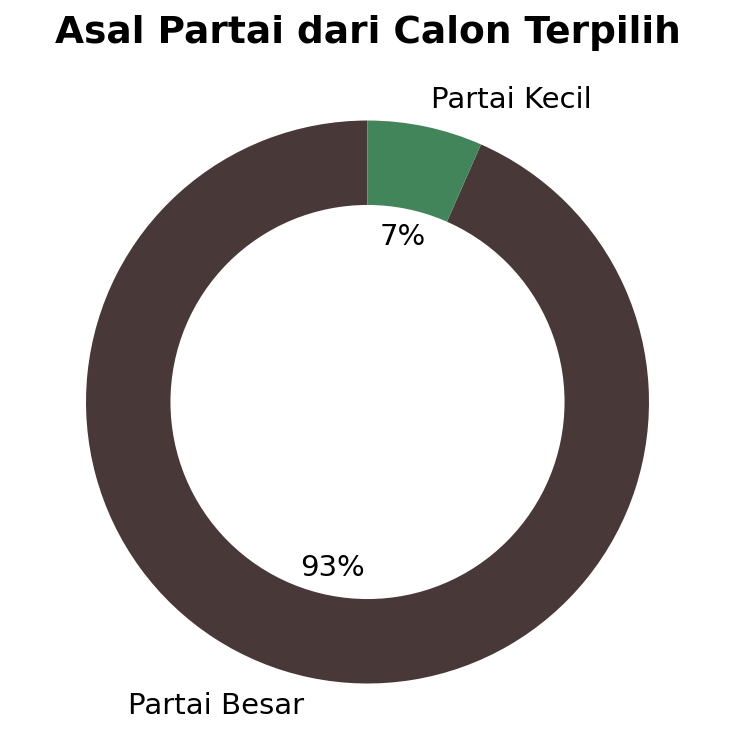

In [6]:
data = (
    df.groupby("partai")
    .agg(
        total_vote=("partai_vote", "sum"),
        jumlah_calon=("nama", "size"),
        jumlah_terpilih=("terpilih", "sum"),
    )
    .sort_values("total_vote", ascending=False)
    .reset_index()
    .assign(
        ukuran_partai=lambda df_: np.where(
            (df_["total_vote"] < df_["total_vote"].median()),
            "Partai Kecil",
            "Partai Besar",
        ),
        persentase_terpilih=lambda df_: df_["jumlah_terpilih"]
        .div(df_["jumlah_calon"])
        .mul(100)
        .round(1),
    )
    .loc[
        :,
        [
            "partai",
            "total_vote",
            "ukuran_partai",
            "jumlah_calon",
            "jumlah_terpilih",
            "persentase_terpilih",
        ],
    ]
    .rename(columns=lambda c: c.replace("_", " ").title())
    .groupby("Ukuran Partai")
    .sum(numeric_only=True)
    .reset_index()
    .loc[:, ["Ukuran Partai", "Persentase Terpilih"]]
)

module.create_donut(
    data["Persentase Terpilih"],
    data["Ukuran Partai"],
    "Asal Partai dari Calon Terpilih",
)

Arti dari hal ini adalah, jika kita bergabung dengan partai kecil, kemungkinan kita terpilih hanya 0.91%, amat sangat kecil.

In [7]:
(
    df.groupby("partai")
    .agg(
        total_vote=("partai_vote", "sum"),
        jumlah_calon=("nama", "size"),
        jumlah_terpilih=("terpilih", "sum"),
    )
    .sort_values("total_vote", ascending=False)
    .reset_index()
    .assign(
        ukuran_partai=lambda df_: np.where(
            (df_["total_vote"] < df_["total_vote"].median()),
            "Partai Kecil",
            "Partai Besar",
        ),
        persentase_terpilih=lambda df_: df_["jumlah_terpilih"]
        .div(df_["jumlah_calon"])
        .mul(100)
        .round(1),
    )
    .loc[:, ["partai", "ukuran_partai", "jumlah_calon", "jumlah_terpilih"]]
    .groupby("ukuran_partai")
    .sum(numeric_only=True)
    .assign(
        kemungkinan_terpilih=lambda df_: df_["jumlah_terpilih"]
        .div(df_["jumlah_calon"])
        .mul(100)
        .round(2)
    )
    .reset_index()
    .rename(columns=lambda c: c.replace("_", " ").title())
)

,Ukuran Partai,Jumlah Calon,Jumlah Terpilih,Kemungkinan Terpilih
0,Partai Besar,848,99,11.67
1,Partai Kecil,767,7,0.91


# 2. Apakah dengan Bergabung ke Partai Besar, Jumlah Vote akan Naik?

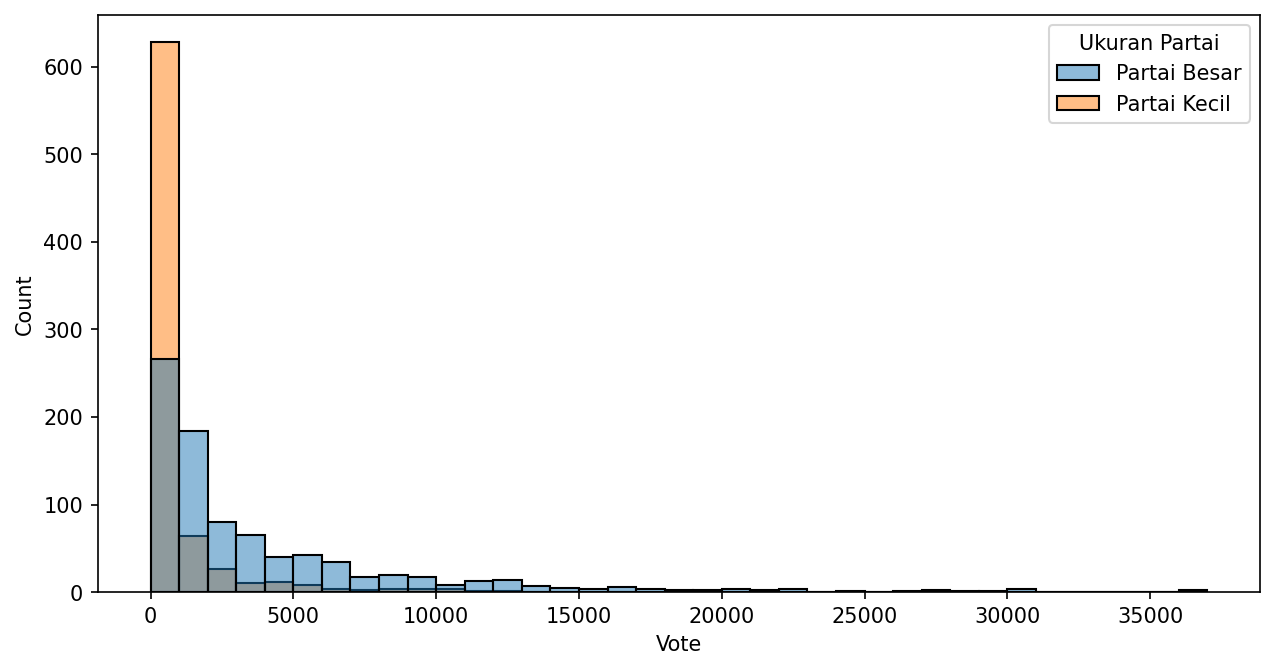

In [47]:
map_ukuran_partai = (
    df.groupby("partai")
    .agg(total_vote=("partai_vote", "sum"))
    .sort_values("total_vote", ascending=False)
    .reset_index()
    .assign(
        ukuran_partai=lambda df_: np.where(
            (df_["total_vote"] < df_["total_vote"].median()),
            "Partai Kecil",
            "Partai Besar",
        )
    )
    .loc[:, ["partai", "ukuran_partai"]]
    .set_index("partai")
    .to_dict()
    .get("ukuran_partai")
)

data = (
    df.loc[:, ["nama", "partai", "vote"]]
    .assign(ukuran_partai=lambda df_: df_["partai"].map(map_ukuran_partai))
    .loc[:, ["nama", "ukuran_partai", "vote"]]
    .rename(columns=lambda c: c.replace('_', ' ').title())
)

fig, ax = plt.subplots(figsize=(10, 5), dpi=150)
sns.histplot(
    data,
    x="Vote",
    hue="Ukuran Partai",
    binwidth=1000, 
    ax=ax,
)
plt.show()

Dari chart ini, bisa kita lihat bahwa mayoritas calon dari partai kecil hanya mendapat 0-6000 vote. 
Calon dari partai besar bisa mendapat vote sampai dengan 20000 bahkan 35000. Ini membuktikan bahwa bergabung ke partai besar ada korelasi nya dengan jumlah vote yang didapat calon.